In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
def column_info(data):
    cols=[]
    dtypes=[]
    uniques=[]
    nuniques=[]
    nulls=[]
    null_per=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        uniques.append(data[col].unique())
        nuniques.append(data[col].nunique())
        nulls.append(data[col].isna().sum())
        null_per.append((data[col].isna().sum())/len(data))
        
    return pd.DataFrame({'col':cols,'dtype':dtypes,'unique':uniques,'nunique':nuniques,'null_per':null_per})

In [12]:
len(data)

1460

In [13]:
pd.set_option('display.max_rows',None)
column_info(data)

,col,dtype,unique,nunique,null_per
0,Id,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1460,0.000000
1,MSSubClass,int64,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...",15,0.000000
2,MSZoning,object,"[RL, RM, C (all), FV, RH]",5,0.000000
3,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110,0.177397
4,LotArea,int64,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",1073,0.000000
5,Street,object,"[Pave, Grvl]",2,0.000000
6,Alley,object,"[nan, Grvl, Pave]",2,0.937671
7,LotShape,object,"[Reg, IR1, IR2, IR3]",4,0.000000
8,LandContour,object,"[Lvl, Bnk, Low, HLS]",4,0.000000
9,Utilities,object,"[AllPub, NoSeWa]",2,0.000000


In [14]:
data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

## Handle Missing Values  

In [16]:
from sklearn.impute import SimpleImputer

for col in data.columns:
    if data[col].dtype=='object':
        
        imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        data[col]=imputer.fit_transform(data[col].values.reshape(-1,1))
        
    else:
        imputer=SimpleImputer(missing_values=np.nan,strategy='median')
        data[col]=imputer.fit_transform(data[col].values.reshape(-1,1))
    

In [17]:
column_info(data)

,col,dtype,unique,nunique,null_per
0,Id,float64,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",1460,0.0
1,MSSubClass,float64,"[60.0, 20.0, 70.0, 50.0, 190.0, 45.0, 90.0, 12...",15,0.0
2,MSZoning,object,"[RL, RM, C (all), FV, RH]",5,0.0
3,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 69....",110,0.0
4,LotArea,float64,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0, 141...",1073,0.0
5,Street,object,"[Pave, Grvl]",2,0.0
6,LotShape,object,"[Reg, IR1, IR2, IR3]",4,0.0
7,LandContour,object,"[Lvl, Bnk, Low, HLS]",4,0.0
8,Utilities,object,"[AllPub, NoSeWa]",2,0.0
9,LotConfig,object,"[Inside, FR2, Corner, CulDSac, FR3]",5,0.0


In [18]:
import warnings
warnings.filterwarnings('ignore')

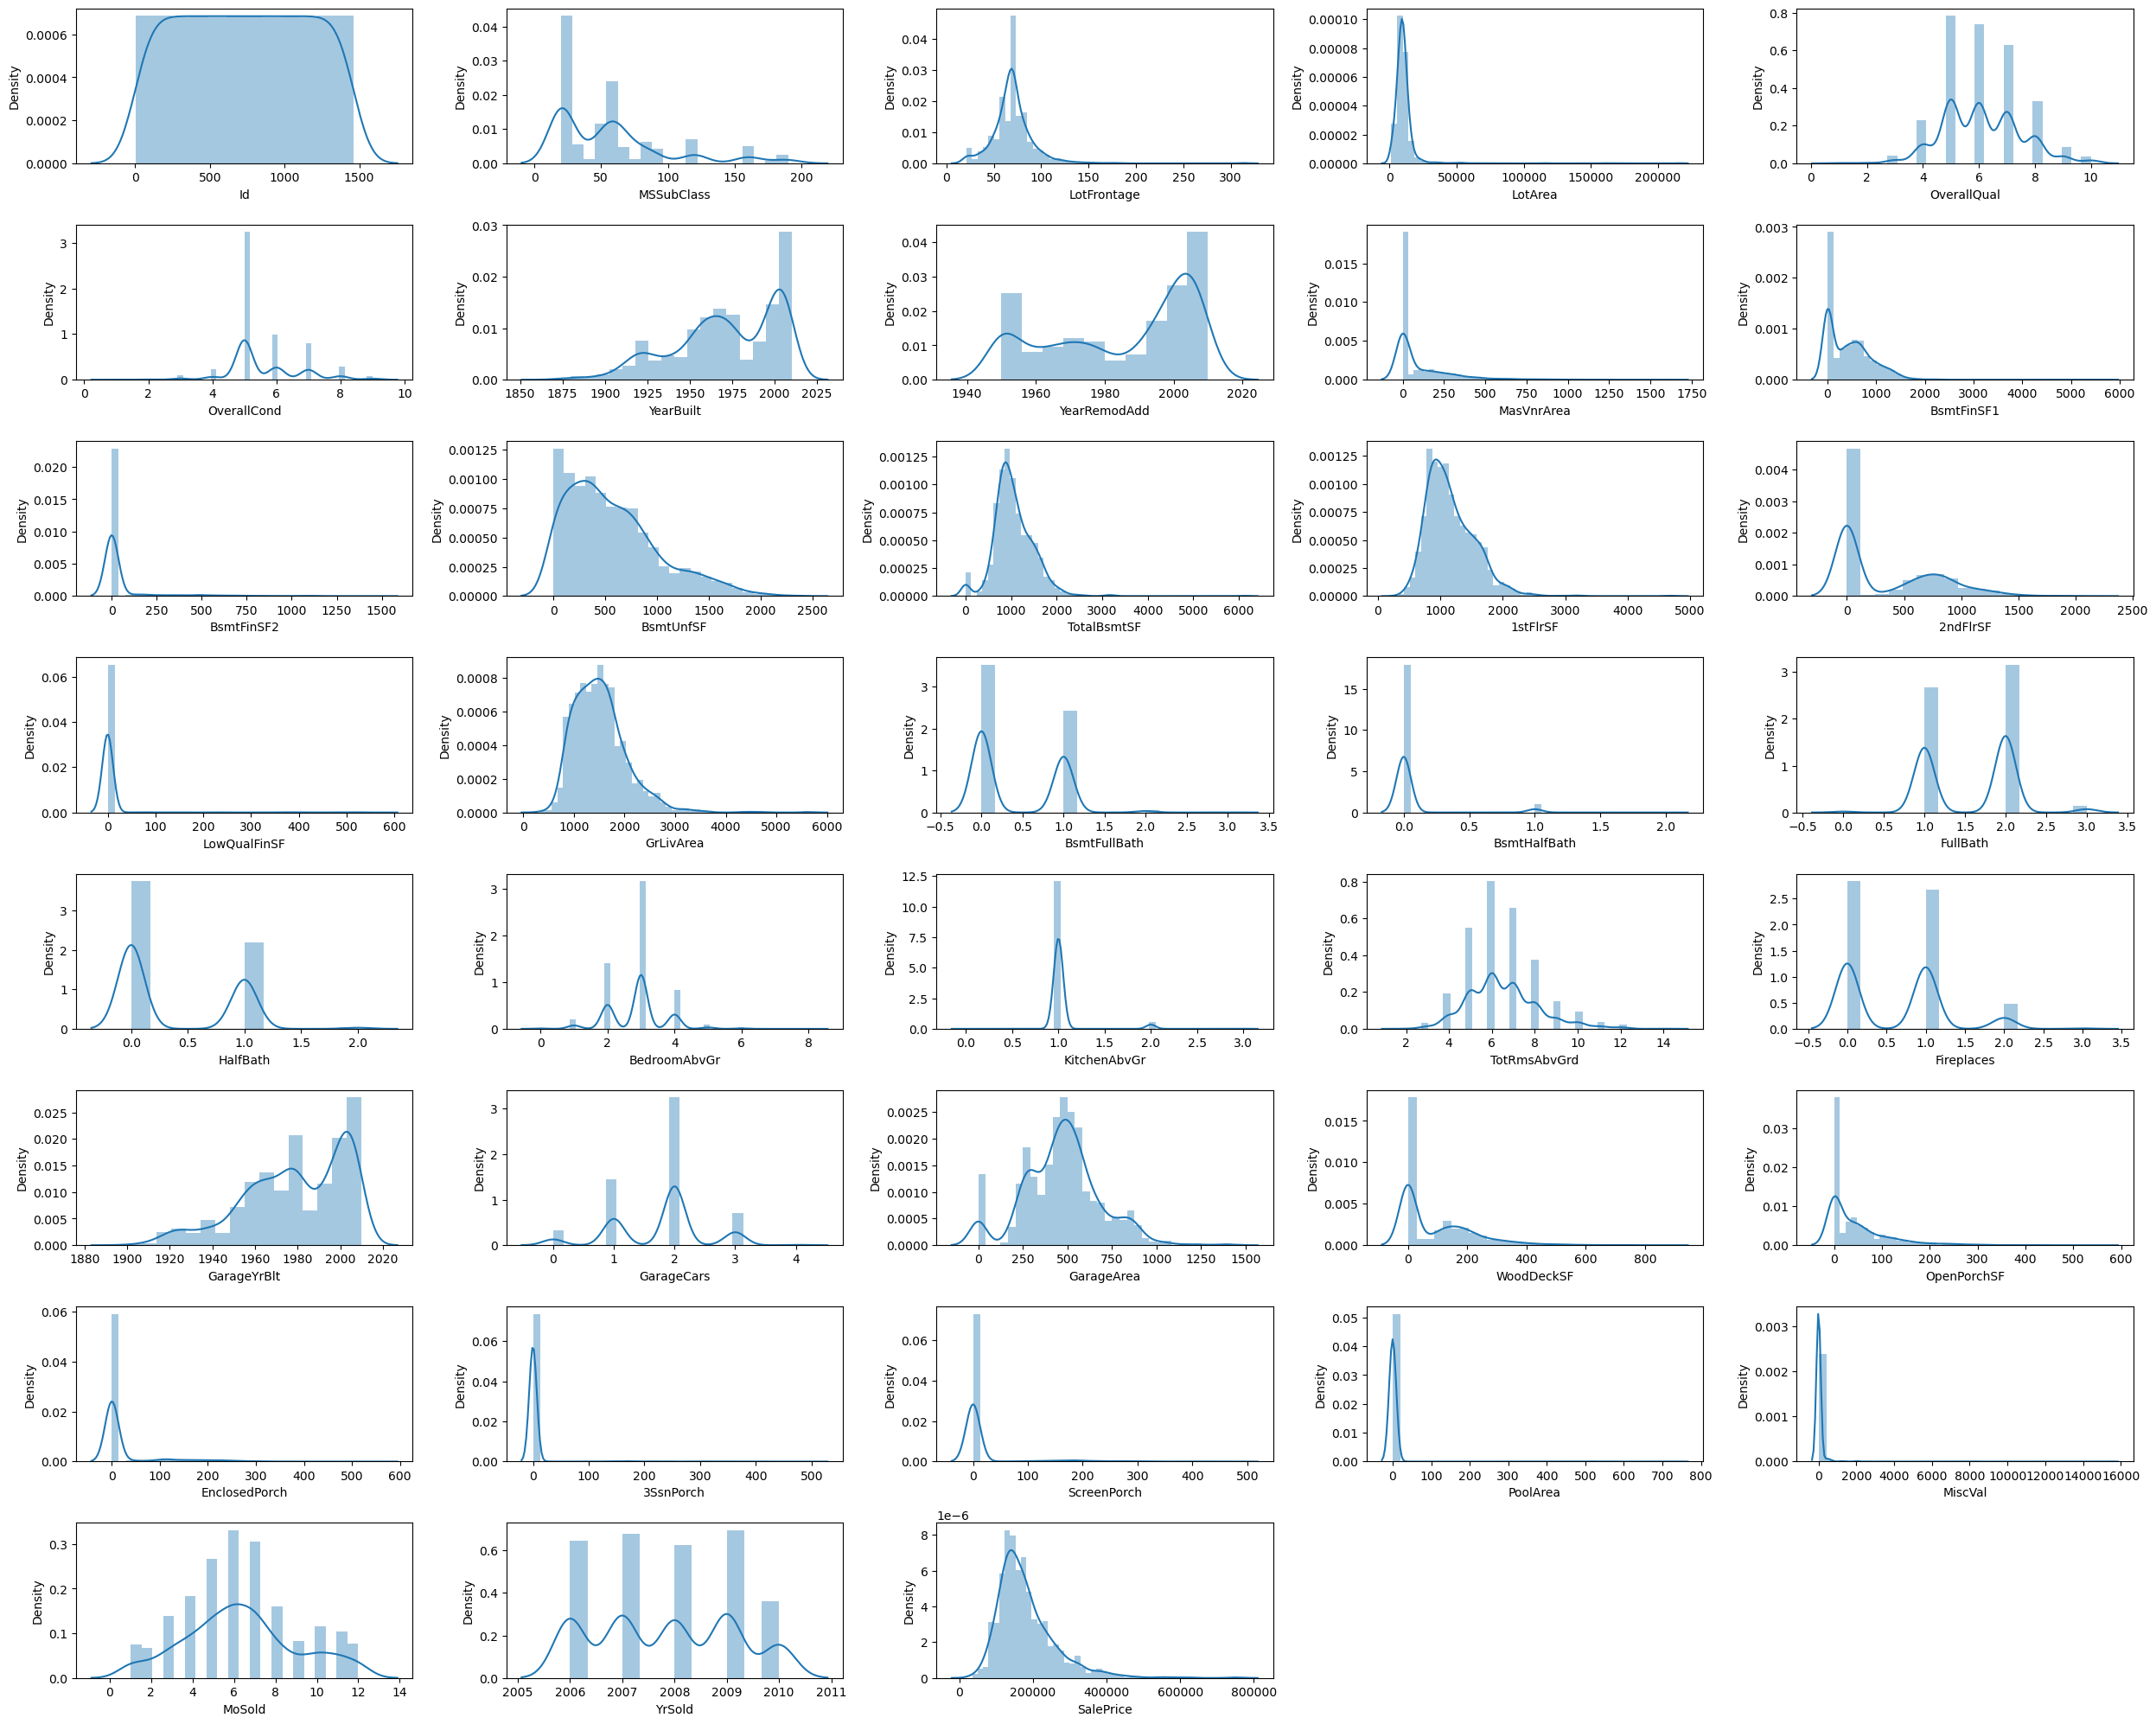

In [25]:
import seaborn as sns
i=1
plt.figure(figsize=(25,20))
for col in data.columns:
    if data[col].dtype!='object':
        plt.subplot(8,5,i)
        sns.distplot(data[col])
        i+=1
    
plt.tight_layout(pad=0.9)
plt.show()

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

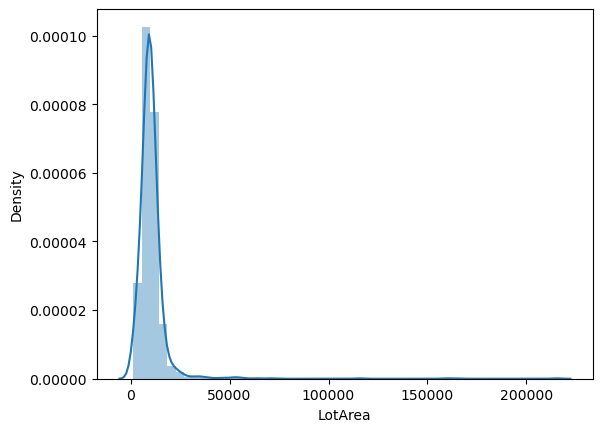

In [26]:
sns.distplot(data['LotArea'])

In [28]:
def check_outlier(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    
    
    
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    
    outliers=[]
    for i in range(len(data)):
        if data.loc[i,col]>upper_b or data.loc[i,col]<lower_b:
            outliers.append(data.loc[i,col])
                    
                    
    return outliers

In [29]:
check_outlier('LotArea',data)

[50271.0,
 19900.0,
 21000.0,
 21453.0,
 19378.0,
 31770.0,
 22950.0,
 25419.0,
 159000.0,
 19296.0,
 39104.0,
 19138.0,
 18386.0,
 215245.0,
 164660.0,
 20431.0,
 18800.0,
 53107.0,
 34650.0,
 22420.0,
 21750.0,
 70761.0,
 53227.0,
 40094.0,
 32668.0,
 21872.0,
 21780.0,
 25095.0,
 46589.0,
 20896.0,
 18450.0,
 21535.0,
 26178.0,
 115149.0,
 21695.0,
 53504.0,
 21384.0,
 28698.0,
 45600.0,
 17920.0,
 25286.0,
 27650.0,
 24090.0,
 25000.0,
 1300.0,
 21286.0,
 1477.0,
 21750.0,
 29959.0,
 18000.0,
 23257.0,
 17755.0,
 35760.0,
 18030.0,
 35133.0,
 32463.0,
 18890.0,
 24682.0,
 23595.0,
 17871.0,
 36500.0,
 63887.0,
 20781.0,
 25339.0,
 57200.0,
 20544.0,
 19690.0,
 21930.0,
 26142.0]

In [31]:
def handle_outlier(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    
    
    
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    
    for i in range(len(data)):
        if data.loc[i,col]>upper_b :
            data.loc[i,col]=upper_b
        elif data.loc[i,col]<lower_b:
            data.loc[i,col]=lower_b
handle_outlier('LotArea',data)                    

In [32]:
check_outlier('LotArea',data)

[]

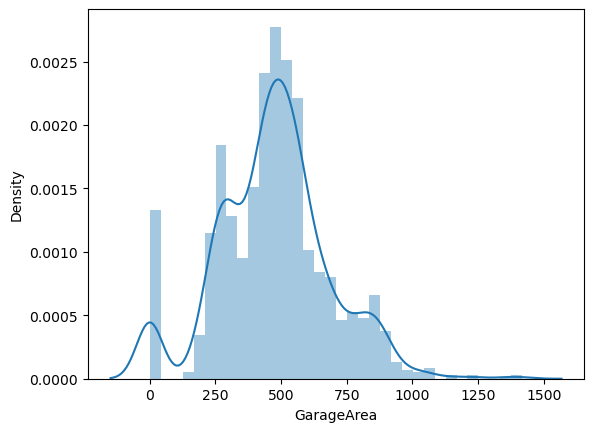

In [33]:
sns.distplot(data['GarageArea'])
plt.show()

In [34]:
def check_outlier(col,data):
    mean=data[col].mean()
    st=data[col].std()
    
    
    lower_b=mean-3*st
    upper_b=mean+3*st
    
    outliers=[]
    for i in range(len(data)):
        if data.loc[i,col]>upper_b or data.loc[i,col]<lower_b:
            outliers.append(data.loc[i,col])
                    
                    
    return outliers

In [35]:

check_outlier('GarageArea',data)

[1166.0, 1390.0, 1134.0, 1220.0, 1248.0, 1356.0, 1418.0]

In [36]:
def handle_outlier(col,data):
    mean=data[col].mean()
    st=data[col].std()
    
    
    lower_b=mean-3*st
    upper_b=mean+3*st
    
    for i in range(len(data)):
        if data.loc[i,col]>upper_b :
                data.loc[i,col]=upper_b
        elif data.loc[i,col]<lower_b:
            data.loc[i,col]=lower_b
handle_outlier('GarageArea',data)                    

In [37]:
check_outlier('GarageArea',data)

[1114.3946613464436,
 1114.3946613464436,
 1114.3946613464436,
 1114.3946613464436,
 1114.3946613464436,
 1114.3946613464436,
 1114.3946613464436]